In [1]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
from torch import nn
from torch.autograd import Variable as V
device = t.device('cuda:0') #如果你想用gpu，改成t.device('cuda:0')'cpu'

## 單層全連接層

In [2]:
class Linear(nn.Module):
    def __init__(self, in_feature, out_feature):
        super(Linear, self).__init__()#等於nn.Module.__int__ 呼叫nn.Module
        self.w = nn.Parameter(t.randn(in_feature, out_feature))
        self.b = nn.Parameter(t.randn(out_feature))
    
    def forward(self,x):
        x=x.mm(self.w)
        return x+self.b.expand_as(x)

In [3]:
layer=Linear(4,3)
input1=V(t.randn(2,4))
output=layer(input1)

In [4]:
output.shape

torch.Size([2, 3])

In [5]:
output

tensor([[-0.4704, -1.2778, -2.5447],
        [-1.5609, -3.1872, -0.9058]], grad_fn=<AddBackward0>)

In [6]:
output.shape

torch.Size([2, 3])

In [7]:
output

tensor([[-0.4704, -1.2778, -2.5447],
        [-1.5609, -3.1872, -0.9058]], grad_fn=<AddBackward0>)

## 兩層全連接層

In [8]:
class Perceptron(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        nn.Module.__init__(self)
        self.layer1 = Linear(in_features, hidden_features) # 此处的Linear是前面自定义的全连接层
        self.layer2 = Linear(hidden_features, out_features)
    def forward(self,x):
        x = self.layer1(x)
        x = t.sigmoid(x)
        return self.layer2(x)

In [9]:
perceptron = Perceptron(3,4,1)
for name, param in perceptron.named_parameters():
    print(name, param.size())

layer1.w torch.Size([3, 4])
layer1.b torch.Size([4])
layer2.w torch.Size([4, 1])
layer2.b torch.Size([1])


In [10]:
nn.Linear

torch.nn.modules.linear.Linear

In [11]:
import numpy as np 
import cv2
from torchvision.transforms import ToTensor, ToPILImage
from PIL import Image

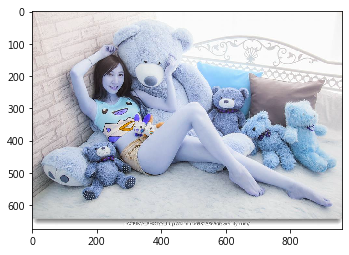

In [12]:
model=cv2.imread('model.jpg')
plt.imshow(model)

In [13]:
model.shape

(673, 960, 3)

In [14]:
model_gray=cv2.cvtColor(model,cv2.COLOR_BGR2GRAY)

In [15]:
model_gray.shape

(673, 960)

In [16]:
to_tensor=ToTensor() #image-->tensor
to_pil=ToPILImage() #则是将Tensor或numpy.ndarray转化为PIL.Image

In [17]:
input=to_tensor(model_gray).unsqueeze(0)

## 捲積層

In [18]:
input1.shape

torch.Size([2, 4])

In [19]:
kernel=t.ones(3,3)/-9.
kernel

tensor([[-0.1111, -0.1111, -0.1111],
        [-0.1111, -0.1111, -0.1111],
        [-0.1111, -0.1111, -0.1111]])

In [20]:
kernel[1][1]=1
kernel

tensor([[-0.1111, -0.1111, -0.1111],
        [-0.1111,  1.0000, -0.1111],
        [-0.1111, -0.1111, -0.1111]])

In [21]:
conv=nn.Conv2d(1,1,(3,3),1,bias=False)
conv.weight.data=kernel.view(1,1,3,3)

In [22]:
out=conv(input)

In [23]:
V(input).shape

torch.Size([1, 1, 673, 960])

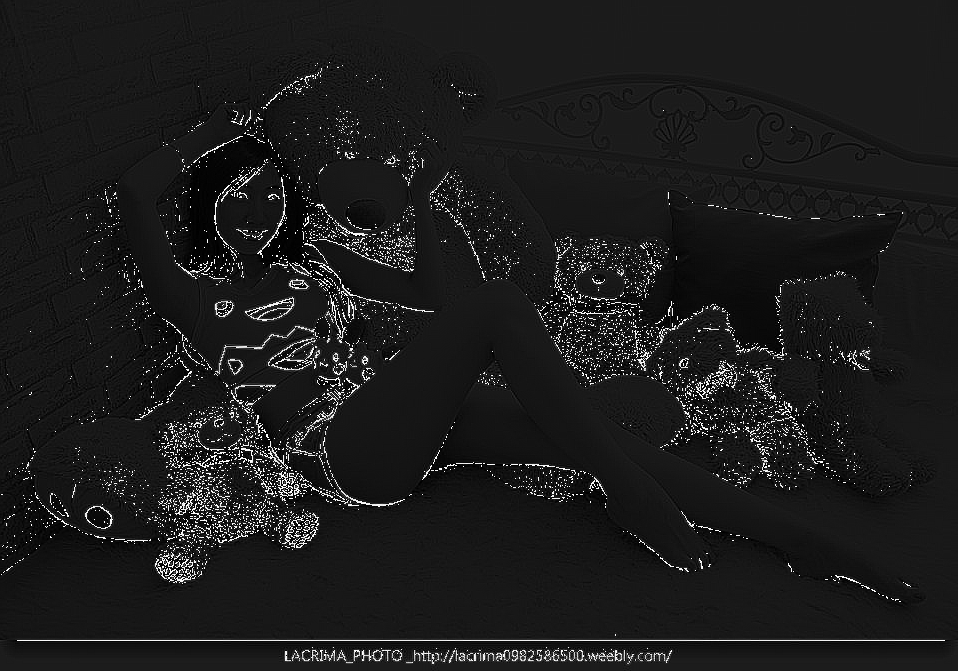

In [24]:
to_pil(out.data.squeeze(0))

In [25]:
out

tensor([[[[0.0810, 0.0832, 0.0906,  ..., 0.0998, 0.1028, 0.1002],
          [0.0880, 0.0863, 0.0893,  ..., 0.1028, 0.1015, 0.0989],
          [0.0841, 0.0771, 0.0767,  ..., 0.1007, 0.0998, 0.1020],
          ...,
          [0.1102, 0.1102, 0.1102,  ..., 0.1102, 0.1102, 0.1102],
          [0.1102, 0.1102, 0.1102,  ..., 0.1102, 0.1102, 0.1102],
          [0.1102, 0.1102, 0.1102,  ..., 0.1102, 0.1102, 0.1102]]]],
       grad_fn=<ThnnConv2DBackward>)

In [26]:
out.data

tensor([[[[0.0810, 0.0832, 0.0906,  ..., 0.0998, 0.1028, 0.1002],
          [0.0880, 0.0863, 0.0893,  ..., 0.1028, 0.1015, 0.0989],
          [0.0841, 0.0771, 0.0767,  ..., 0.1007, 0.0998, 0.1020],
          ...,
          [0.1102, 0.1102, 0.1102,  ..., 0.1102, 0.1102, 0.1102],
          [0.1102, 0.1102, 0.1102,  ..., 0.1102, 0.1102, 0.1102],
          [0.1102, 0.1102, 0.1102,  ..., 0.1102, 0.1102, 0.1102]]]])

In [27]:
out.data.squeeze(0)

tensor([[[0.0810, 0.0832, 0.0906,  ..., 0.0998, 0.1028, 0.1002],
         [0.0880, 0.0863, 0.0893,  ..., 0.1028, 0.1015, 0.0989],
         [0.0841, 0.0771, 0.0767,  ..., 0.1007, 0.0998, 0.1020],
         ...,
         [0.1102, 0.1102, 0.1102,  ..., 0.1102, 0.1102, 0.1102],
         [0.1102, 0.1102, 0.1102,  ..., 0.1102, 0.1102, 0.1102],
         [0.1102, 0.1102, 0.1102,  ..., 0.1102, 0.1102, 0.1102]]])

## 池化層(可以理解為取出精華)

In [28]:
pool=nn.AvgPool2d(2,2)


In [29]:
list(pool.parameters())

[]

In [30]:
out_pool=pool(V(input))


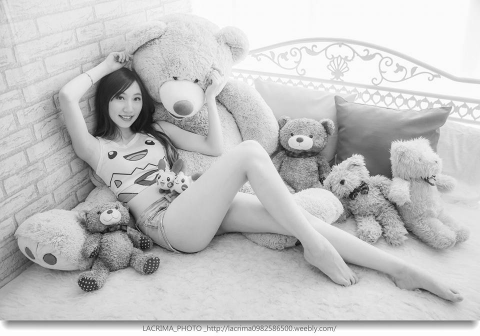

In [31]:
to_pil(out_pool.data.squeeze(0))

In [32]:
out_pool.shape

torch.Size([1, 1, 336, 480])

In [33]:
model_gray.shape

(673, 960)

In [34]:
input_number=V(t.rand(2,3))
input_number

tensor([[0.2757, 0.7617, 0.5173],
        [0.7999, 0.5117, 0.1017]])

In [35]:
linear=nn.Linear(3,4)#全連接層
linear

Linear(in_features=3, out_features=4, bias=True)

In [36]:
try1=to_tensor(model_gray).unsqueeze(0) #输入是一个batch，batch_size＝1
try1.shape

torch.Size([1, 1, 673, 960])

In [37]:
input2=V(t.randn(2,3))#batch_size＝2維度為3

In [38]:
input2

tensor([[ 1.1101,  1.1351,  0.0317],
        [-0.6456,  0.3423,  0.9265]])

In [39]:
input2.shape

torch.Size([2, 3])

In [40]:
h=linear(input2)

In [41]:
bn=nn.BatchNorm1d(4)

In [42]:
bn.weight.data=t.ones(4)*4

In [43]:
bn.bias.data=t.zeros(4)

In [44]:
bn_out=bn(h)

In [45]:
bn_out.mean(0),bn_out.var(0,unbiased=False)

(tensor([-4.2915e-06,  2.3842e-07,  3.5763e-07,  0.0000e+00],
        grad_fn=<MeanBackward1>),
 tensor([15.1694, 15.9929, 15.9987, 15.9991], grad_fn=<VarBackward1>))

In [46]:
dropout=nn.Dropout(0.5)
dropout(bn_out)

tensor([[-0.0000,  0.0000,  7.9997,  0.0000],
        [ 0.0000, -0.0000, -0.0000, -7.9998]], grad_fn=<MulBackward0>)

## 快速建立神經網路

In [52]:
net2=t.nn.Sequential(
    t.nn.Linear(1,10),
    t.nn.ReLU(),
    t.nn.Linear(10,1)    
)

In [53]:
print(net2)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


In [55]:
import torch.nn.functional as F

In [56]:
class Net1(t.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super (Net1,self).__init__()
        self.layer1=t.nn.Linear(n_input,n_hidden)
        self.layer2=t.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=nn.ReLU(self.layer1(x))
        x=self.layer2(x)
        
        return x
        

In [58]:
net1=Net1(1,10,1)

In [59]:
print(net1)

Net1(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)


In [64]:
class Net2(t.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super (Net2,self).__init__()
        self.layer1=t.nn.Linear(n_input,n_hidden)
        self.layer2=t.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=F.relu(self.layer1(x))
        x=self.layer2(x)
        
        return x

In [65]:
net2=Net2(1,10,1)

In [66]:
print(net2)

Net2(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)
